<div class="alert alert-info"> <h1 align = "center"> <font color=red> LENDING CLUB - Machine Learning Models </font> </h1> </div>

---
---
# <font color=red> Table of contents </font>
<a id="content_table"></a>

<b>Part 1. Introduction </b><br>

<b>Part 2. Setup</b><br>
2.1) [Configuration](#descriptive_statistics)<br>
2.2) [Librabries](#descriptive_statistics)<br>
2.3) [Utility Functions](#descriptive_statistics)<br>

<b>Part 3. Data Preparation</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 4. Logistic Regression using stats package</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 5. Logistic Regression using sklearn package</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 6. Gaussian Naive Bayes</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 7. LDA</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 8. QDA</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 9. Decision Tree</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 10. Random Forest</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 11. AdaBoost</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 12. Gradient Boosting</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 13. Xgboost</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 14. KNN</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 15. DNN</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 16. SVM</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 17. Fisher LDA</b><br>
[Overview](#descriptive_statistics)<br>

<b>Part 18. Model Selection </b><br>
[Overview](#descriptive_statistics)<br>

---
---
# <font color=red> 1. Introduction
    
This section includes following five major sections:
+ Building models: focus on training the various models on data features
+ Model tuning and optimization involves tuning specific model parameters, known as hyperparameters and optimizing the model to get the best model
+ Model evaluation techniques: involves using standard performance evaluation metrics like accuracy to evaluate model performance 
+ Model interpretation
+ Model selection: usually the final step to select the most suitable model

---
---

# <font color=red>2. Setup</font>

### <font color=blue>2.1. Configuration

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
from pathlib import Path
import os

# Dataframe manipulation
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
# sns.set(style = 'whitegrid',context = 'notebook')
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, Normalizer, scale
from sklearn import metrics

# Modelling Helpers:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn.feature_selection import RFECV

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import math

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


### <font color=blue>2.2. Define function

In [2]:
def get_metrics(true_labels, predicted_labels, predicted_prob):
    
    print('Accuracy:', np.round(accuracy_score(true_labels, predicted_labels),4))
    print('Precision:', np.round(precision_score(true_labels, predicted_labels,average='weighted'),4))
    print('Recall:', np.round(recall_score(true_labels,predicted_labels,average='weighted'),4))
    print('F1 Score:', np.round(f1_score(true_labels,predicted_labels,average='weighted'),4))
    print('ROC-AUC: {}'.format(np.round(roc_auc_score(true_labels, predicted_prob),4)))                   

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[0,1]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = confusion_matrix(y_true=true_labels, y_pred=predicted_labels,labels=classes)
    cm_df = pd.DataFrame(cm)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Predicted'
    print(cm_df) 
    
def display_classification_report(true_labels, predicted_labels, classes=[0,1]):

    report = classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, predicted_prob, classes=[0,1]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels, predicted_prob=predicted_prob)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)

---
---

# <font color=red>3. Data Preparation

### <font color=blue> 3.1. Load data
    
Load preprocessed data that was done in previous step to build predictive models

In [3]:
df_train = pd.read_csv('../data/processed/loan_data_pipeline2_train.csv')
df_test = pd.read_csv('../data/processed/loan_data_pipeline2_test.csv')

df_train.shape, df_test.shape
df_train.Class.sum()/len(df_train), df_test.Class.sum()/len(df_test)

(0.18994728709355718, 0.18973390708702906)

In [4]:
df_train.head()

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,emp_length,num_of_year,sub_grade_ratio,purpose_ratio,zip_code_ratio,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,Class
0,0.275362,0.0,0.431686,0.440054,0.187344,0.0,0.333333,0.197368,0.0,0.221585,0.238117,0.243243,0.578947,0.714286,0.208883,0.371387,0.405719,1,0,0,0,0,0,0,0,0
1,0.228986,0.0,0.359496,0.367384,0.563782,0.0,0.166667,0.184211,0.0,0.918200,0.365471,0.189189,0.473684,0.676190,0.229165,0.186905,0.385233,1,0,0,0,0,0,1,0,1
2,0.130435,1.0,0.251938,0.310864,0.120810,0.0,0.000000,0.065789,0.0,0.020821,0.190583,0.027027,0.157895,0.619048,0.135145,0.487562,0.347472,0,0,0,0,1,0,0,0,0
3,0.681159,1.0,0.721415,0.227698,0.580540,0.0,0.166667,0.171053,0.0,0.183357,0.381614,0.128378,0.894737,0.685714,0.471674,0.371387,0.406724,1,0,0,0,0,0,1,0,0
4,0.594203,1.0,0.479167,0.512723,0.322661,0.0,0.166667,0.263158,0.0,0.291393,0.239462,0.229730,1.000000,0.714286,0.229165,0.186941,0.299877,1,0,0,0,0,0,1,0,0


In [5]:
df_test.head()

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,emp_length,num_of_year,sub_grade_ratio,purpose_ratio,zip_code_ratio,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,home_ownership_MORTGAGE,Class
0,0.927536,1.0,0.463663,0.250306,0.233117,0.0,0.000000,0.092105,0.0,0.016903,0.019283,0.121622,0.000000,0.685714,0.332675,0.186941,0.349532,0,0,0,0,0,1,0,0,0
1,0.855072,0.0,0.447190,0.694397,0.333667,0.0,0.000000,0.118421,0.0,0.026670,0.100448,0.243243,0.052632,0.666667,0.229165,0.371387,0.343034,0,0,0,0,0,1,0,0,0
2,0.420290,0.0,0.168605,0.331050,0.207604,0.0,0.000000,0.092105,0.0,0.082584,0.304036,0.121622,1.000000,0.828571,0.073167,0.371387,0.429575,0,0,0,0,0,1,0,0,0
3,0.275362,0.0,0.522287,0.157450,0.691846,0.0,0.166667,0.118421,0.0,0.212140,0.322422,0.229730,0.000000,0.695238,0.297200,0.186941,0.884671,0,0,0,0,1,0,0,0,0
4,0.333333,1.0,0.510174,0.363347,0.378689,0.0,0.000000,0.092105,0.0,0.143535,0.216143,0.310811,1.000000,0.761905,0.451353,0.371387,0.342920,0,0,0,0,0,0,0,0,0


### <font color=blue>3.2. Split data into X & y

In [6]:
X_train = df_train.drop(['Class'], axis=1)
y_train = df_train.Class

X_test = df_test.drop(['Class'], axis=1)
y_test = df_test.Class

### <font color=blue>3.3. Categorize vars

In [7]:
TRAIN_VARS = X_train.columns
print('All training vars: ', TRAIN_VARS)

NUM_VARS = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
                          'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'emp_length',
                          'num_of_year', 'sub_grade_ratio', 'purpose_ratio', 'zip_code_ratio']
print('\nNumerical vars: ', NUM_VARS)

CAT_VARS = ['home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'initial_list_status_w', 'home_ownership_MORTGAGE']
print('\nCategorical vars: ', CAT_VARS)

All training vars:  Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'emp_length', 'num_of_year', 'sub_grade_ratio', 'purpose_ratio', 'zip_code_ratio', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'initial_list_status_w'], dtype='object')

Numerical vars:  ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'emp_length', 'num_of_year', 'sub_grade_ratio', 'purpose_ratio', 'zip_code_ratio']

Categorical vars:  ['home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'initial_list_status_w', 'home_ownership_MORTGAGE']


---
---
# <font color=red>4. Logistic Regression using stats model

### <font color=blue>1. Overview

Logistic Regression predicts the probability of an event occuring and has the form

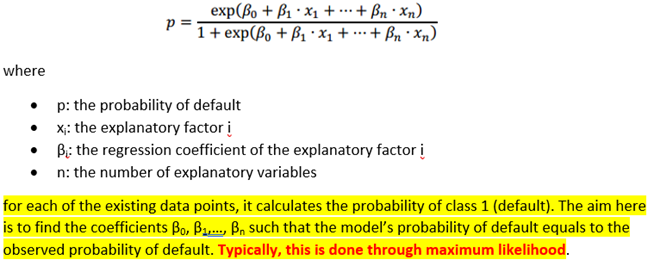

### <font color=blue>2. Train model and Result

In [8]:
import statsmodels.api as sm

# add constant
X_train_const = sm.add_constant(X_train[TRAIN_VARS])
X_test_const = sm.add_constant(X_test[TRAIN_VARS])

# train model
model = sm.Logit(y_train, X_train_const)
result = model.fit()

# view result
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.442008
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               182498
Model:                          Logit   Df Residuals:                   182472
Method:                           MLE   Df Model:                           25
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                 0.09079
Time:                        00:59:15   Log-Likelihood:                -80666.
converged:                       True   LL-Null:                       -88721.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -37.3368   5.36e+05

=>  Summary table shows the result of logistic regression estimates of various factors influencing loan payment defaults. Howerver, from the table, it can be seen that there are many features that are not statistically significant ( p> 0.05) such as home_ownership_ variables, verification_status_. Including unnesscary features may cause some problems for logistic regression such as overfitting, unreasonable interpretation. Therefore, feature selection should be performed to eliminates these features. 

### <font color=blue>3. Feature Selection

#### Step forward

In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the minimum p-value. Then, continue to fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the minimum p-value. Next, it fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a p-value of individual features less than the significance level.

In short, the steps for the forward selection technique are as follows :

1. Choose a significance level (e.g. SL = 0.05 with a 95% confidence).

2. Fit all possible simple regression models by considering one feature at a time. Total ’n’ models are possible. Select the feature with the lowest p-value.

3. Fit all possible models with one extra feature added to the previously selected feature(s).

4. Again, select the feature with a minimum p-value. if p_value < significance level then go to Step 3, otherwise terminate the process.


#### Step backward eliminination

In backward elimination, we start with the full model (including all the independent variables) and then remove the insignificant feature with the highest p-value(> significance level). This process repeats again and again until we have the final set of significant features.

In short, the steps involved in backward elimination are as follows:

1. Choose a significance level (e.g. SL = 0.05 with a 95% confidence).

2. Fit a full model including all the features.

3. Consider the feature with the highest p-value. If the p-value > significance level then go to Step 4, otherwise terminate the process.

4. Remove the feature which is under consideration.

Fit a model without this feature. Repeat the entire process from Step 3.


#### Bi-directional elimination(Step-wise Selection)

It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination.

Hence, It is a combination of forward selection and backward elimination.

In short, the steps involved in bi-directional elimination are as follows:

1. Choose a significance level to enter and exit the model (e.g. SL_in = 0.05 and SL_out = 0.05 with 95% confidence).

2. Perform the next step of forward selection (newly added feature must have p-value < SL_in to enter).

3. Perform all steps of backward elimination (any previously added feature with p-value>SL_out is ready to exit the model).

Repeat steps 2 and 3 until we get a final optimal set of features.

In [9]:
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            print(new_column)
            model = sm.Logit(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features


def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.Logit(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            print(new_column)
            model = sm.Logit(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.Logit(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

#best_features = forward_selection(processed_X_train[TRAIN_VARS],y_train)
#best_features = backward_elimination(processed_X_train[TRAIN_VARS],y_train)
best_features = stepwise_selection(X_train[TRAIN_VARS],y_train)

home_ownership_RENT
Optimization terminated successfully.
         Current function value: 0.485108
         Iterations 5
home_ownership_MORTGAGE
Optimization terminated successfully.
         Current function value: 0.484981
         Iterations 5
emp_length
Optimization terminated successfully.
         Current function value: 0.486145
         Iterations 5
annual_inc
Optimization terminated successfully.
         Current function value: 0.482454
         Iterations 6
delinq_2yrs
Optimization terminated successfully.
         Current function value: 0.486088
         Iterations 5
sub_grade_ratio
Optimization terminated successfully.
         Current function value: 0.459604
         Iterations 6
verification_status_Source Verified
Optimization terminated successfully.
         Current function value: 0.485960
         Iterations 5
num_of_year
Optimization terminated successfully.
         Current function value: 0.485802
         Iterations 5
purpose_ratio
Optimization terminated succ

Optimization terminated successfully.
         Current function value: 0.455371
         Iterations 6
home_ownership_OWN
Optimization terminated successfully.
         Current function value: 0.455390
         Iterations 6
term
Optimization terminated successfully.
         Current function value: 0.454089
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.451774
         Iterations 6
home_ownership_RENT
Optimization terminated successfully.
         Current function value: 0.450736
         Iterations 6
home_ownership_MORTGAGE
Optimization terminated successfully.
         Current function value: 0.450803
         Iterations 6
emp_length
Optimization terminated successfully.
         Current function value: 0.451671
         Iterations 6
annual_inc
Optimization terminated successfully.
         Current function value: 0.449409
         Iterations 6
delinq_2yrs
Optimization terminated successfully.
         Current function value: 0.451766
  

Optimization terminated successfully.
         Current function value: 0.444682
         Iterations 6
home_ownership_MORTGAGE
Optimization terminated successfully.
         Current function value: 0.444787
         Iterations 6
emp_length
Optimization terminated successfully.
         Current function value: 0.445287
         Iterations 6
delinq_2yrs
Optimization terminated successfully.
         Current function value: 0.445331
         Iterations 6
sub_grade_ratio
Optimization terminated successfully.
         Current function value: 0.445351
         Iterations 6
verification_status_Source Verified
Optimization terminated successfully.
         Current function value: 0.445265
         Iterations 6
num_of_year
Optimization terminated successfully.
         Current function value: 0.445303
         Iterations 6
purpose_ratio
Optimization terminated successfully.
         Current function value: 0.444789
         Iterations 6
loan_amnt
Optimization terminated successfully.
         Cu

Optimization terminated successfully.
         Current function value: 0.443634
         Iterations 6
verification_status_Source Verified
Optimization terminated successfully.
         Current function value: 0.443548
         Iterations 6
num_of_year
Optimization terminated successfully.
         Current function value: 0.443608
         Iterations 6
revol_bal
Optimization terminated successfully.
         Current function value: 0.443633
         Iterations 6
home_ownership_OWN
Optimization terminated successfully.
         Current function value: 0.443612
         Iterations 6
home_ownership_OTHER
Optimization terminated successfully.
         Current function value: 0.443631
         Iterations 6
inq_last_6mths
Optimization terminated successfully.
         Current function value: 0.443407
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.443180
         Iterations 6
home_ownership_MORTGAGE
Optimization terminated successfully.
         

Optimization terminated successfully.
         Current function value: 0.442112
         Iterations 6
emp_length
Optimization terminated successfully.
         Current function value: 0.442133
         Iterations 6
home_ownership_NONE
Optimization terminated successfully.
         Current function value: 0.442136
         Iterations 6
verification_status_Verified
Optimization terminated successfully.
         Current function value: 0.442126
         Iterations 6
delinq_2yrs
Optimization terminated successfully.
         Current function value: 0.442076
         Iterations 6
pub_rec
Optimization terminated successfully.
         Current function value: 0.442132
         Iterations 6
initial_list_status_w
Optimization terminated successfully.
         Current function value: 0.442136
         Iterations 6
sub_grade_ratio
Optimization terminated successfully.
         Current function value: 0.442129
         Iterations 6
num_of_year
Optimization terminated successfully.
         Current

In [10]:
print(TRAIN_VARS)
print()
print(best_features)
print()
print([var for var in TRAIN_VARS if var not in best_features])

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'emp_length', 'num_of_year', 'sub_grade_ratio', 'purpose_ratio', 'zip_code_ratio', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'initial_list_status_w'], dtype='object')

['zip_code_ratio', 'dti', 'int_rate', 'annual_inc', 'term', 'home_ownership_RENT', 'loan_amnt', 'purpose_ratio', 'total_acc', 'inq_last_6mths', 'open_acc', 'revol_util', 'verification_status_Source Verified', 'delinq_2yrs', 'home_ownership_MORTGAGE', 'revol_bal']

['pub_rec', 'emp_length', 'num_of_year', 'sub_grade_ratio', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'verification_status_Verified', 'initial_list_status_w']


### <font color=blue>4. Re-train with important features

In [11]:
import statsmodels.api as sm

# add constant
X_train_const = sm.add_constant(X_train[best_features])
X_test_conts = sm.add_constant(X_test[best_features])

# train model
lg = sm.Logit(y_train, X_train_const)
result = lg.fit()

# view result
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.442035
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               182498
Model:                          Logit   Df Residuals:                   182481
Method:                           MLE   Df Model:                           16
Date:                Tue, 12 Jul 2022   Pseudo R-squ.:                 0.09074
Time:                        01:01:45   Log-Likelihood:                -80670.
converged:                       True   LL-Null:                       -88721.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.8260      0.044 

Now, all features are statistically significant with p-value < 0.05

---
---
# <font color=red>5. Logistic Regression - sklearn

### <font color=blue>1. Train model

In [12]:
from sklearn.linear_model import LogisticRegression

# Parameter C is the inverse regulariazation strength (high values = low regularization)
lg = LogisticRegression(C=1e20, penalty='l2', solver='liblinear')
lg.fit(X_train[best_features], y_train)

LogisticRegression(C=1e+20, solver='liblinear')

In [13]:
import joblib

# export model to pkl file
joblib.dump(lg, 'credit_risk_logistic_regression.pkl')

['credit_risk_logistic_regression.pkl']

### <font color=blue>2. Prediction

In [14]:
y_train_pred = lg.predict(X_train[best_features])
prob_train_pred = lg.predict_proba(X_train[best_features])

y_test_pred = lg.predict(X_test[best_features])
prob_test_pred = lg.predict_proba(X_test[best_features])

### <font color=blue>3. Model Result

#### Intercept

In [15]:
lg.intercept_

array([-3.8256422])

#### Coefficients

In [16]:
lg.coef_

array([[ 1.84512946,  0.8134995 ,  2.03092654, -1.61461371,  0.43015153,
         0.13208583,  0.53811549,  0.65965567, -2.04703619,  0.45752189,
         1.79519322,  0.79836115,  0.0729729 ,  0.30211928, -0.07004318,
        -0.12126511]])

<AxesSubplot:>

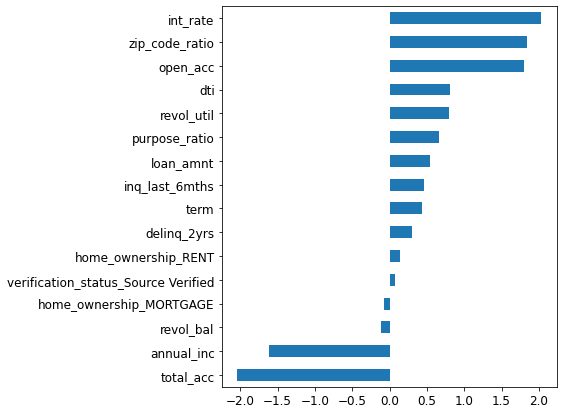

In [17]:
importance = pd.Series(lg.coef_.ravel())
importance.index = best_features
importance.sort_values(inplace=True, ascending=True)
importance.plot.barh(figsize=(6,7))

#### Summary Table

In [18]:
def LogisticSummaryTable(model, feature_list):
    summary_table =pd.DataFrame(columns=['FeatureName'], data=feature_list)
    summary_table['Coefficient'] = np.transpose(model.coef_)
    summary_table = summary_table.append({"FeatureName":  'const', 'Coefficient': np.round(model.intercept_,3)[0]},ignore_index=True)
    summary_table['OddsRatio'] = np.exp(summary_table['Coefficient'])
    summary_table = summary_table.sort_values('OddsRatio', ascending=False)
    
    return summary_table

LogisticSummaryTable(lg, best_features)

,FeatureName,Coefficient,OddsRatio
2,int_rate,2.030927,7.621144
0,zip_code_ratio,1.845129,6.328919
10,open_acc,1.795193,6.020638
1,dti,0.813499,2.255788
11,revol_util,0.798361,2.221897
7,purpose_ratio,0.659656,1.934126
6,loan_amnt,0.538115,1.712776
9,inq_last_6mths,0.457522,1.580153
4,term,0.430152,1.537490
13,delinq_2yrs,0.302119,1.352723


Table shows the result of logistic regression estimates of the various factors influencing loan defaults. 
+ Columns Coefficient indicates the contribution or importance of each predictor variable. Variables that seem to be the most important are zip_code_ratio, int_rate, total_acc
+ Column OddsRatio show the change in the probability of default if the variable changes by one unit. This can provide further guidance to the business by giving the impact of each individual explanatory variable to the client’s forecasted probability of default
    + For feature int_rate, the odds ratios of 2.023 indicates that risk of customer with larger number of dependents, is 7.56 times more likely to default in repayment as compared with those with least number of dependents, all other factors being equal. \
    + For feature total_acc, the odds ratio of is total_acc, this indicates that, the risk of a customer defaulting in a loan repayment is 0.1275 times higher for a customer who is married and with children than for customers who are single, all other factors being equal

### <font color=blue>4. Performance Evaluation 

#### Overview

The following metrics are often used to generate summary performance estimates in a classificaiton model:
+ Accuracy
+ The area under the curve (AUC) of the receiver operating characteristic (ROC) curve
+ Sensitivity
+ Specificity
+ Positve predictive value [PPV]
+ Negative predictive value [NPV]

These metrics are measured on the Train-Test split or Cross-validation methods

#### Confusion Matrix

1. Confusion matrix is a matrix that can be used to give the quick overview of the model by comparing the predicted class label of a data point with its actual class label. Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class. But it can be the other way around as well, i.e. rows for predicted classes and columns for actual classes

2. The confusion matrix by itself is not a performance measure for classification models, but it can be used to calcualte several metrics that are useful measures for different scenarios

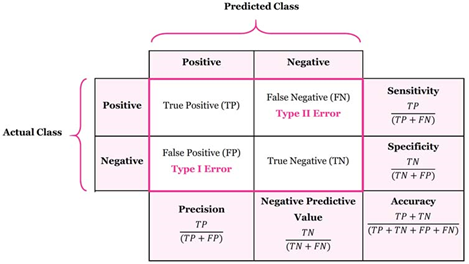

In [19]:
from sklearn.metrics import confusion_matrix

def create_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    cm_df = pd.DataFrame(cm)
    cm_df.index.name = 'Actual'
    cm_df.columns.name = 'Prediction'
    
    return cm_df

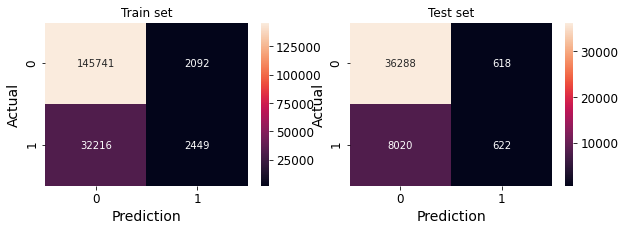

In [20]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.heatmap(create_confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.title('Train set')
plt.subplot(122)
sns.heatmap(create_confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.title('Test set')
plt.show()

#### Classification Report

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89    147833
           1       0.54      0.07      0.12     34665

    accuracy                           0.81    182498
   macro avg       0.68      0.53      0.51    182498
weighted avg       0.77      0.81      0.75    182498

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     36906
           1       0.50      0.07      0.13      8642

    accuracy                           0.81     45548
   macro avg       0.66      0.53      0.51     45548
weighted avg       0.76      0.81      0.75     45548



#### Accuracy score

This is one of the most popular measures of classifier performance. It is defined as the overall accuracy or proportion of correct predictions of the model
+ Accuracy measure is normally used when our classes are almost balanced and correct predictions of those classes are equally important
+ **In case data is imbalanced, the accuracy is not adequate**. For example, we have 1000 samples, 995 of theses are negative and 5 are positive cases. Assume that there is a classifier, which classifies whatever it will be presented as negative. The accuracy is a surprising 99.5%, even though the classifier could not recognize any positive examples

In [22]:
accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

(0.8120088987276572, 0.8103539123561957)

#### ROC and AUC

1. The ROC curve (Receiver operating characteristic) is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. Or The ROC curve reflects the relationship between the (1-specificity) and sensitivity. A good classifier aims for the upper left for the ROC curve. 
2. The AUC (area under the curve) is the C statistic and it indicates the performance of the model. The higher means the more 'agreement' between the model and the acutal data
3. Intuitively, ROC tells us that if we are trying to improtve the accuracy rate of predicted class 1 within the actual class 1 by decreasing the cut of point, then the accuracy rate of predicted class 0 within the actual class 0 will generally decrease

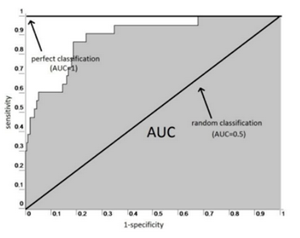

In [23]:
from sklearn.metrics import roc_curve

def plot_roc_curve(y_train, prob_train_pred, y_test, prob_test_pred):
    fpr_train, tpr_train, threshold = roc_curve(y_train, prob_train_pred[:,1])
    fpr_test, tpr_test, threshold = roc_curve(y_test, prob_test_pred[:,1])
    
    plt.figure(figsize=(6,6))
    plt.title('ROC Curve Classifiers', fontsize=16)
    plt.plot(fpr_train, tpr_train, label='Train Score: {:.4f}'.format(roc_auc_score(y_train, prob_train_pred[:,1])))
    plt.plot(fpr_test, tpr_test, label='Test Score: {:.4f}'.format(roc_auc_score(y_test, prob_test_pred[:,1])))
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)',
                 xy=(0.5, 0.5), xytext=(0.6, 0.3), arrowprops=dict(facecolor='#6E726D', shrink=0.05))
    plt.legend()
    plt.show    
    

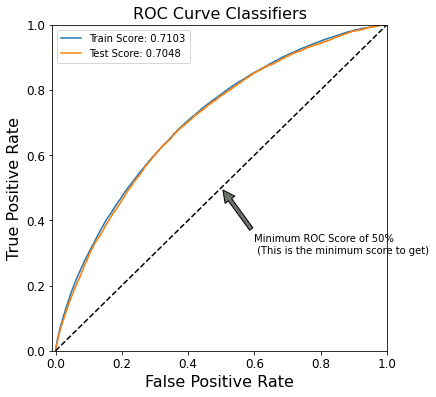

In [24]:
plot_roc_curve(y_train, prob_train_pred, y_test, prob_test_pred)

#### Recall and the Decision Boundary T

Shows the tradeoff between recall rates of 2 classes for different thresholds

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def precision_recall_threshold(pred_proba, label):
    t_recall_0, t_recall_1 = [], []
    t_precision_0, t_precision_1 = [], []
    
    for threshold in np.arange(0, 1, 0.01):
        precision, recall, fscore, support = \
            metrics.precision_recall_fscore_support(label, np.where(pred_proba[:,1] > threshold, 1, 0))
        recall_0, recall_1 = recall
        precision_0, precision_1 = precision
            
        t_recall_0.append(recall_0)
        t_recall_1.append(recall_1)
        t_precision_0.append(precision_0)
        t_precision_1.append(precision_1)
    return t_precision_0, t_precision_1, t_recall_0, t_recall_1

def plot_recall_vs_decision_boundary(t_recall_1,t_recall_0,threshold,filename = 'Recall_score.png'):
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(0,1,0.01), t_recall_1, label='Class1')
    plt.plot(np.arange(0,1,0.01), t_recall_0, label='Class0')
    plt.plot([.5, .5], [0,1], 'k--')
    plt.plot([threshold, threshold], [0,1], 'k--')
    plt.ylim([0.0, 1.01])
    plt.xlim([0.0, 1.01])
    plt.legend(loc='upper left', fontsize = 14)
    plt.title('Recall vs. Decision Boundary\n'
              'using Logistic Regression Classifier',
              fontsize=14)
    plt.xlabel('Decision Boundary (T)', fontsize=14)
    plt.ylabel('Recall Rate', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.savefig(filename)
    plt.show()

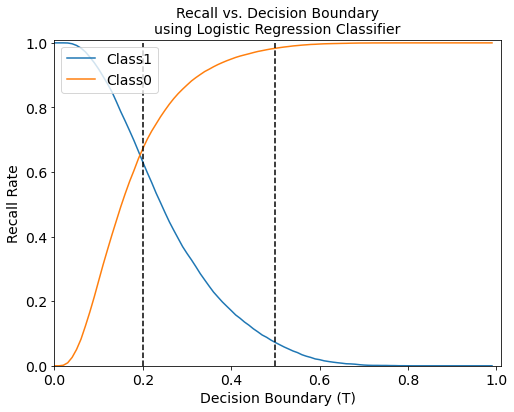

In [26]:
t_precision_0, t_precision_1, t_recall_0, t_recall_1 = precision_recall_threshold(prob_test_pred, y_test)
plot_recall_vs_decision_boundary(t_recall_1, t_recall_0, .2)

At the default decision boundary of T = 0.5, the recall rate for default (class1) was only 0.07, meaning that only 7% of the time we classify a default loan that in-fact is default. Since our objective is to maximize our ability to identify default, we can shift decision boundary to a point which would allow us to identify default at least 65% of the time. To achieve this, we shifted out decision boundary rightward to T = 0.2, where the recall rate for default was 0.65, and coincidentally, the recall rate for non-default was also 0.65. This means that by shifting our decision boundary, we were able to identify many more default, only having to sacrifice a recall rate of 30% on the non-default

#### Precision-Recall curve

Shows the tradeoff between precision and recall for different thresholds: For each instance, it computes a score based on decision function, and if score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class

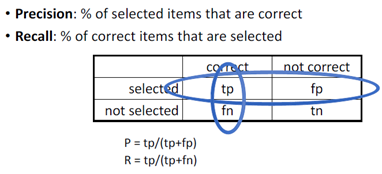

In [27]:
def select_threshold(label, y_score):
    
    precision, recall, threshold = precision_recall_curve(label, y_score)

    #plt.figure(figsize=(8,5))
    plt.plot(threshold, precision[1:], label='Precision', linewidth=3)
    plt.plot(threshold, recall[1:], label='Recall', linewidth=3)
    plt.title('Precision and recall for different threshold values')
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    plt.legend()

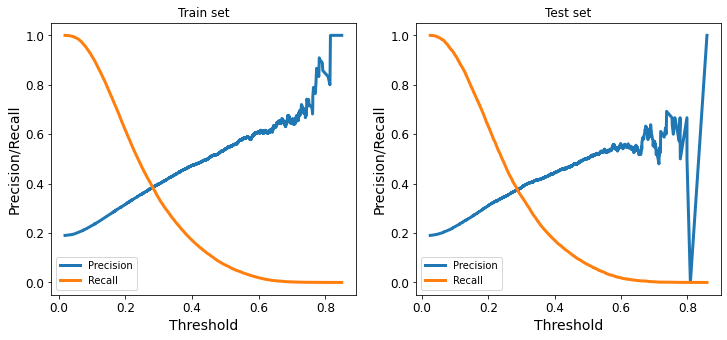

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
select_threshold(y_train, prob_train_pred[:,1])
plt.title('Train set')
plt.subplot(1,2,2)
select_threshold(y_test, prob_test_pred[:,1])
plt.title('Test set')
plt.show()

=> At the default, threshold = 0.5, the recall rate is 0.07, meaning that only 7% of the time we classify a default loan that in fact is default. Since our objective is to maximize the ability to identify default, we decide to shift our decision boundary to a point which would allow us to identify default loan at least 60% of the time. To achive this, we shift the threshold to 0.2, but we have to sacrifice the precision to approximately 0.3

Another way to select a good precision/recall trade off is to plot precision directly against recall. You will probably want to select a precision/recall tradeoff just before the drop - at around 60% recall. But of course the choice depends on the project

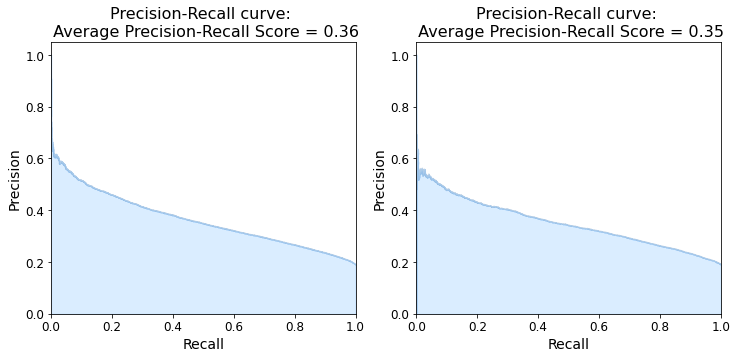

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def plot_average_precision(label, y_score):
    precision, recall, threshold = precision_recall_curve(label, y_score)
    average_precision = average_precision_score(label, y_score)
    plt.step(recall, precision, color='#004a93', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: \n Average Precision-Recall Score = {0:0.2f}'.format(average_precision), fontsize=16)

plt.figure(figsize=[12, 5])
y_score = prob_train_pred[:,1]
plt.subplot(121)
plot_average_precision(y_train, y_score)
#plt.title('Train set')
plt.subplot(122)
y_score = prob_test_pred[:,1]
plot_average_precision(y_test, y_score)
#plt.title('Test set') 

#### Select threshold = 0.2

In [30]:
tr = 0.2
y_train_pred = np.where(prob_train_pred[:,1] > tr, 1, 0)
y_test_pred = np.where(prob_test_pred[:,1] > tr,1 , 0)

In [31]:
prediction_df = pd.DataFrame()
prediction_df['True_Outcome'] = y_test
prediction_df['Prediction'] = y_test_pred
prediction_df['Probability'] = prob_test_pred[:,1]

prediction_df[prediction_df.Probability > 0.2]

,True_Outcome,Prediction,Probability
3,0,1,0.394302
5,0,1,0.527463
10,1,1,0.338374
12,0,1,0.242701
13,1,1,0.402716
...,...,...,...
45532,0,1,0.203657
45533,0,1,0.344356
45534,0,1,0.418011
45535,0,1,0.265302


#### Calculate performance metrics for threshold = 0.2

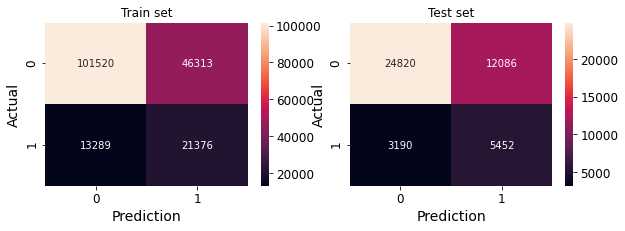

In [32]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.heatmap(create_confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.title('Train set')
plt.subplot(122)
sns.heatmap(create_confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.title('Test set')
plt.show()

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77    147833
           1       0.32      0.62      0.42     34665

    accuracy                           0.67    182498
   macro avg       0.60      0.65      0.60    182498
weighted avg       0.78      0.67      0.71    182498

              precision    recall  f1-score   support

           0       0.89      0.67      0.76     36906
           1       0.31      0.63      0.42      8642

    accuracy                           0.66     45548
   macro avg       0.60      0.65      0.59     45548
weighted avg       0.78      0.66      0.70     45548



#### Perform 10-fold cross-validation for logistic Regression

We train the model on the training set, and we test the accuracy of the model on the test set. That’s correct but we may have the variance problem. The variance problem can be explained by the fact that when we get the accuracy on the test set, and then we run the model again and test the performance on another test set. We can get very different accuracy. So, testing the accuracy of the model only on one training set and one test set is not good enough to evaluate the performance

K-Folds Cross Validation help to avoid underfitting as well as overfitting. The aim is to be able to generalize the model to new datasets with same accuracy. In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The k results can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is that all observations are used for both training and validation, and each observation is used for validation exactly once

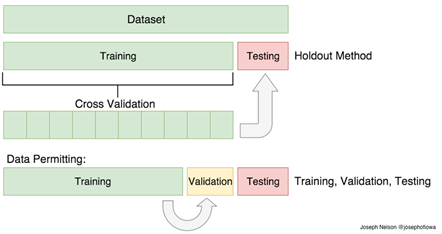


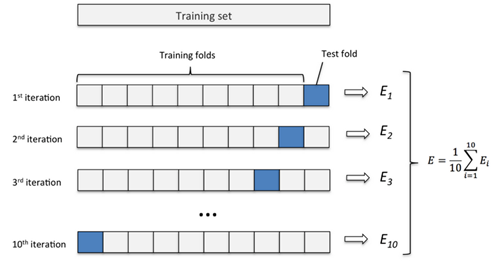

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e20, penalty='l2', solver='liblinear')
kfold = KFold(n_splits=10)

# accuracy
scores = cross_val_score(model, X_train[best_features], y_train, cv=kfold, scoring='roc_auc')
print(scores)
print('ROC AUC: %0.2f%% (+/- %0.2f%%)' % (100*scores.mean(), 100*scores.std()))
pd.Series(scores).describe()

[0.70852936 0.70607639 0.71212213 0.71128344 0.71051003 0.71101502
 0.70742689 0.71584117 0.71049312 0.70750737]
ROC AUC: 71.01% (+/- 0.27%)


count    10.000000
mean      0.710080
std       0.002831
min       0.706076
25%       0.707763
50%       0.710502
75%       0.711216
max       0.715841
dtype: float64

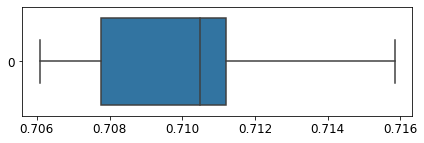

In [35]:
plt.figure(figsize=(7,2))
sns.boxplot(data=scores, orient='h')
plt.show()

### <font color=blue>5. Tuning hyper-parameters 
    
1. Hyperparameters are not learned by the model, we choose ourselves. There are still room to improve the accuracy of the model if we choose the optimal values of hyperparamters for the model

2. Grid search is the simplest of the hyperparameter optimization methods. In this method we will specify the grid of values (of hyperparameters) that we want to try out and optimize to get the best parameter combinations. Then we will buld models on each of those values (combination of multiple parameter values), using cross-validation approach and report the best parameter's combination in the whole grid. The output will be the model using the best combination from the grid. Although it is quite simple, it suffers from one serious drawback that the use has to manually supply the actual parameters, which may or may not contain the most optimal parameters.

In [36]:
# Specify parameters
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 5000, 10000]
params = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

grid_search = GridSearchCV(LogisticRegression(), params, cv=5, verbose=2)
grid_search.fit(X_train[best_features], y_train)
grid_search.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.7s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.9s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.9s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.7s
[CV] C=0.001, multi_class=ovr, penalty=l1, solver=liblinear ..........
[CV]  C=0.001, multi_class=ovr, penalty=l1, solver=liblinear, total=   0.8s
[CV] C=0.01, multi_class=ovr, penalty=l1, solver=liblinear ...........
[CV]  C=0.01, multi_class=ovr, penalty=l1, solver=liblinear, total=   2.2s
[CV] C=0.01, multi_class=ovr, penalty=l1, solver=liblinear ...........
[CV]  C=0.01, multi_class=ovr, penalty=l1, solver=liblinear, total=   1.9s
[CV] C=0.01, multi_class=ovr, penalty=l1, solver=liblinear ...........
[CV]  C=0.01, multi_class=ovr, penalty=l1, solver=liblinear, total=   1.9s
[CV] C=0.01, multi_class=ovr, penalty=l1, sol

[CV]  C=0.01, multi_class=ovr, penalty=l2, solver=liblinear, total=   0.9s
[CV] C=0.01, multi_class=ovr, penalty=l2, solver=liblinear ...........
[CV]  C=0.01, multi_class=ovr, penalty=l2, solver=liblinear, total=   0.9s
[CV] C=0.01, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=0.01, multi_class=ovr, penalty=l2, solver=newton-cg, total=   1.6s
[CV] C=0.01, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=0.01, multi_class=ovr, penalty=l2, solver=newton-cg, total=   1.6s
[CV] C=0.01, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=0.01, multi_class=ovr, penalty=l2, solver=newton-cg, total=   1.8s
[CV] C=0.01, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=0.01, multi_class=ovr, penalty=l2, solver=newton-cg, total=   1.6s
[CV] C=0.01, multi_class=ovr, penalty=l2, solver=newton-cg ...........
[CV]  C=0.01, multi_class=ovr, penalty=l2, solver=newton-cg, total=   2.2s
[CV] C=0.01, multi_class=ovr, penalty=l2, solver=

[CV]  C=100, multi_class=ovr, penalty=l2, solver=liblinear, total=   2.0s
[CV] C=100, multi_class=ovr, penalty=l2, solver=liblinear ............
[CV]  C=100, multi_class=ovr, penalty=l2, solver=liblinear, total=   2.1s
[CV] C=100, multi_class=ovr, penalty=l2, solver=liblinear ............
[CV]  C=100, multi_class=ovr, penalty=l2, solver=liblinear, total=   1.5s
[CV] C=100, multi_class=ovr, penalty=l2, solver=liblinear ............
[CV]  C=100, multi_class=ovr, penalty=l2, solver=liblinear, total=   1.6s
[CV] C=100, multi_class=ovr, penalty=l2, solver=newton-cg ............
[CV]  C=100, multi_class=ovr, penalty=l2, solver=newton-cg, total=   2.2s
[CV] C=100, multi_class=ovr, penalty=l2, solver=newton-cg ............
[CV]  C=100, multi_class=ovr, penalty=l2, solver=newton-cg, total=   2.8s
[CV] C=100, multi_class=ovr, penalty=l2, solver=newton-cg ............
[CV]  C=100, multi_class=ovr, penalty=l2, solver=newton-cg, total=   2.8s
[CV] C=100, multi_class=ovr, penalty=l2, solver=newton-c

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  5.8min finished


{'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}

In [37]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=10, multi_class='ovr', solver='newton-cg')

#### Rerun with the best model

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e20, penalty='l2', solver='liblinear')
kfold = KFold(n_splits=10)

# accuracy
scores = cross_val_score(best_model, X_train[best_features], y_train, cv=kfold, scoring='roc_auc')
print(scores)
print('ROC AUC: %0.2f%% (+/- %0.2f%%)' % (100*scores.mean(), 100*scores.std()))
pd.Series(scores).describe()

[0.70853442 0.70605836 0.71212162 0.7112824  0.71050631 0.71099534
 0.70742542 0.71582998 0.71047385 0.70751017]
ROC AUC: 71.01% (+/- 0.27%)


count    10.000000
mean      0.710074
std       0.002830
min       0.706058
25%       0.707766
50%       0.710490
75%       0.711211
max       0.715830
dtype: float64

In [39]:
best_model.fit(X_train[best_features], y_train)
y_train_pred = best_model.predict(X_train[best_features])
prob_train_pred = best_model.predict_proba(X_train[best_features])

y_test_pred = best_model.predict(X_test[best_features])
prob_test_pred = best_model.predict_proba(X_test[best_features])

In [40]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 0.812
Precision: 0.7659
Recall: 0.812
F1 Score: 0.7483
ROC-AUC: 0.7103

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.99      0.89    147833
           1       0.54      0.07      0.12     34665

    accuracy                           0.81    182498
   macro avg       0.68      0.53      0.51    182498
weighted avg       0.77      0.81      0.75    182498


Prediction Confusion Matrix:
------------------------------
Predicted       0     1
Actual                 
0          145768  2065
1           32240  2425

Model Performance metrics:
------------------------------
Accuracy: 0.8099
Precision: 0.757
Recall: 0.8099
F1 Score: 0.7471
ROC-AUC: 0.7053

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     36906
     

In [41]:
LogisticSummaryTable(best_model, best_features)

,FeatureName,Coefficient,OddsRatio
3,zip_code_ratio,9.786614,17793.949602
2,int_rate,2.023751,7.566658
10,open_acc,1.806294,6.087846
1,dti,0.806788,2.240699
11,revol_util,0.801522,2.228930
7,purpose_ratio,0.655588,1.926274
6,loan_amnt,0.520917,1.683570
9,inq_last_6mths,0.455572,1.577076
0,term,0.426905,1.532507
13,delinq_2yrs,0.302112,1.352712


---
---
# <font color=red> 6. Gaussian Naive Bayes

### <font color=blue>1. Overview

1. Bayes Classifier applies Bayes' rule to calculate posterior probability of an object (data point) for each of class. These probabilities can then form the basis of a decision-making process such as assigning the object to the class with the highest probability

    
2. Gassian Naive Bayes' assumption:
    + Features come froms Gaussian distribution
    + Features are independent
    
    
3. Abstract Mathematical Approach
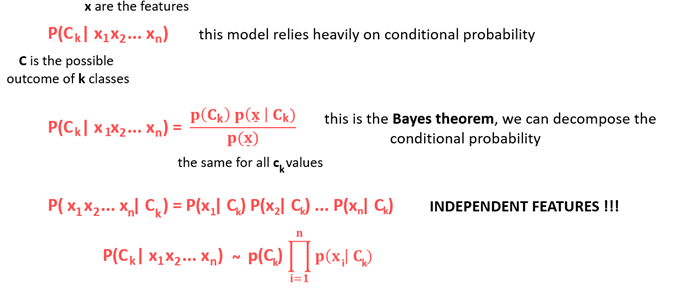

### <font color=blue>2. Train model

#### Select continuos vars

As Gaussian Naive Bayes assumes that the features follow Gaussian distribution, therefore the input features used to train the model should be continous vars

In [42]:
continuous_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'emp_length', 
            'num_of_year', 'sub_grade_ratio', 'purpose_ratio', 'zip_code_ratio']

In [43]:
from sklearn.naive_bayes import GaussianNB

# Initiate model
gnb_model = GaussianNB()

# train model
gnb_model.fit(X_train[continuous_vars], y_train)

GaussianNB()

### <font color=blue>3. Prediction

In [44]:
y_train_pred = gnb_model.predict(X_train[continuous_vars])
prob_train_pred = gnb_model.predict_proba(X_train[continuous_vars])

y_test_pred = gnb_model.predict(X_test[continuous_vars])
prob_test_pred = gnb_model.predict_proba(X_test[continuous_vars])

### <font color=blue>4. Model Evaluation

#### Performance metric in Train set and Test set

In [45]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 0.7783
Precision: 0.7539
Recall: 0.7783
F1 Score: 0.7637
ROC-AUC: 0.6896

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87    147833
           1       0.38      0.28      0.32     34665

    accuracy                           0.78    182498
   macro avg       0.61      0.59      0.59    182498
weighted avg       0.75      0.78      0.76    182498


Prediction Confusion Matrix:
------------------------------
Predicted       0      1
Actual                  
0          132465  15368
1           25099   9566

Model Performance metrics:
------------------------------
Accuracy: 0.7778
Precision: 0.7533
Recall: 0.7778
F1 Score: 0.7631
ROC-AUC: 0.6875

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     3690

---
---
# <font color=red>7. Linear Discriminant Analysis - LDA

### <font color=blue>1. Overview

1. LDA is a Bayes classifier which means it applies Bayes' rule to calculate posterior probability of an object (data point) for each of potential classes. These probabilities can then form the basis of a decision-making process such as assigning the object to the class with the highest probability
    
    
2. However, unlike Naive Bayes, LDA assumes that there are relationships between dependent variables X and these relationships are the same for all classes. Hence, the random variable X is a vector X=(X1, X2,...,Xp) which is drawn from a multivariate Gaussian with class-specific mean vector and a common covariance matrix. In other words, the covariance matrix is common to all K classes. 

    
3. LDA formula to calculate posterior porbabiliy for each class
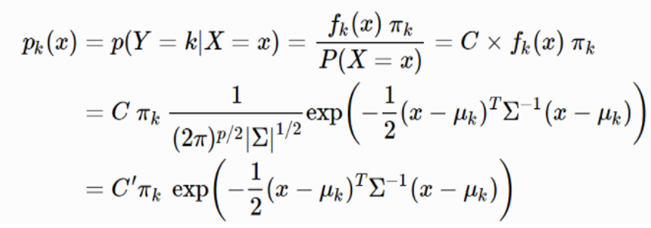

    
4. In practice, the objective function applies this formula

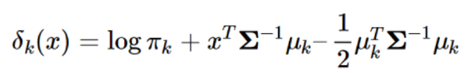

=> It is called linear discriminant function because it is linear in the sense that it has only a linear dependence on x

    
5. Note:
    + Since P(X) does not depend on k so we write it as a constant, all constant terms are put into C, C'
    
    
6. Parameters of multivariate Gaussian: the maximimum likelihood estimates the mean and covariance of a Gaussian
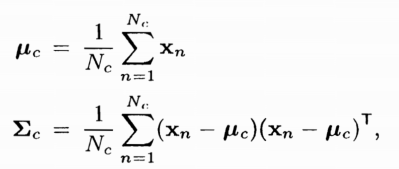

### <font color=blue> 2. Train model

#### Select contionuos vars

As LDA assumes that the features follow Gaussian distribution, therefore the input features used to train the model should be continous vars

In [46]:
continuous_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'emp_length',
            'num_of_year', 'sub_grade_ratio', 'purpose_ratio', 'zip_code_ratio']

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train[continuous_vars], y_train)

LinearDiscriminantAnalysis()

### <font color=blue>3. Prediction

In [48]:
y_train_pred = lda_model.predict(X_train[continuous_vars])
prob_train_pred = lda_model.predict_proba(X_train[continuous_vars])

y_test_pred = lda_model.predict(X_test[continuous_vars])
prob_test_pred = lda_model.predict_proba(X_test[continuous_vars])

### <font color=blue>4. Model Evaluation

#### Performance metric in Train set and Test set

In [49]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 0.81
Precision: 0.7591
Recall: 0.81
F1 Score: 0.7505
ROC-AUC: 0.704

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.98      0.89    147833
           1       0.50      0.08      0.14     34665

    accuracy                           0.81    182498
   macro avg       0.66      0.53      0.52    182498
weighted avg       0.76      0.81      0.75    182498


Prediction Confusion Matrix:
------------------------------
Predicted       0     1
Actual                 
0          144950  2883
1           31795  2870

Model Performance metrics:
------------------------------
Accuracy: 0.8083
Precision: 0.7529
Recall: 0.8083
F1 Score: 0.7482
ROC-AUC: 0.6997

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     36906
       

---
---
# <font color=red> 8. QDA

### <font color=blue>1. Introduction

1. QDA is a Bayes classifier which means it applies Bayes' rule to calculate posterior probability of an object (data point) for each of potential classes. These probabilities can then form the basis of a decision-making process such as assigning the object to the class with the highest probability
    
2. QDA is similar to LDA except that QDA assumes individual covariance matrices different, then the discriminant function becomes, which is quadratic in x in the last term

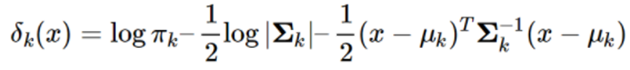

2. QDA requires many more parameters than LDA because of the multiple covariance matrices used. Although the extra flexibility may be useful, but the suggession is the simple model of LDA will suffice unless the covariance differenes between classes are significant

### <font color=blue> 2. Train model

In [50]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis(store_covariance=True)
qda_model.fit(X_train[continuous_vars], y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

### <font color=blue> 3. Prediction

In [51]:
y_train_pred = qda_model.predict(X_train[continuous_vars])
prob_train_pred = qda_model.predict_proba(X_train[continuous_vars])

y_test_pred = qda_model.predict(X_test[continuous_vars])
prob_test_pred = qda_model.predict_proba(X_test[continuous_vars])

### <font color=blue>4. Model Evaluation

In [52]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 0.7893
Precision: 0.745
Recall: 0.7893
F1 Score: 0.7579
ROC-AUC: 0.6814

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.83      0.93      0.88    147833
           1       0.38      0.18      0.25     34665

    accuracy                           0.79    182498
   macro avg       0.61      0.56      0.56    182498
weighted avg       0.74      0.79      0.76    182498


Prediction Confusion Matrix:
------------------------------
Predicted       0      1
Actual                  
0          137717  10116
1           28333   6332

Model Performance metrics:
------------------------------
Accuracy: 0.7864
Precision: 0.741
Recall: 0.7864
F1 Score: 0.7549
ROC-AUC: 0.6788

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     36906


---
---
# <font color=red>9. Decision Tree

### <font color=blue> 1. Overview
    
1. Decision tree is a non-parametric model which involves stratifying or segmenting the predictor space into a number of simple regions using splitting rules based on possible values of features. The set of splitting rules used to segment the object space can usually be summerized in a tree, so these are called decision tree methods
    
    
2. For example: We have a single feature x, the number of hours a student spent with studying. We want to predict the y probability of passing the exam
    
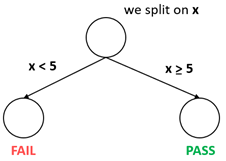
    
    
3. In order to make a prediction for a given object, it uses the mean for regression problem and mode for classification of the training labels in the region to which it belongs
    
    
4. How to construct a tree (CART Algorithm): By default, sklearn uses CART algorithm. In short, it applies greedy-search to find the best feature that best splits the data at that node. CART algorithm uses Gini indexes to decide how to make the splits with the following formula
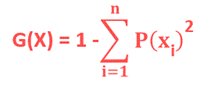   
We have to calculate the Gini-index concerning a given split and Information Gain. We split the feature with the lowest Gini-Index
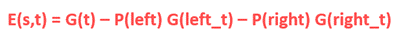

### <font color=blue>2. Training Decision Tree with default parameters

In [53]:
# select a class of model
from sklearn.tree import DecisionTreeClassifier

# initiate model
tree_model = DecisionTreeClassifier()

# train model
tree_model.fit(X_train, y_train)

# default parameters
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### <font color=blue>3. Performance on Train set vs. Test set

In [54]:
y_train_pred = tree_model.predict(X_train)
prob_train_pred = tree_model.predict_proba(X_train)

y_test_pred = tree_model.predict(X_test)
prob_test_pred = tree_model.predict_proba(X_test)

In [55]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147833
           1       1.00      1.00      1.00     34665

    accuracy                           1.00    182498
   macro avg       1.00      1.00      1.00    182498
weighted avg       1.00      1.00      1.00    182498


Prediction Confusion Matrix:
------------------------------
Predicted       0      1
Actual                  
0          147833      0
1               0  34665

Model Performance metrics:
------------------------------
Accuracy: 0.7051
Precision: 0.7185
Recall: 0.7051
F1 Score: 0.7115
ROC-AUC: 0.544

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.83      0.80      0.82     36906
           1  

=> Siginficant problem with Decision Tree: By default, Decision-Tree often has over-fitting problem: the result on the train set is very high (ROC-AUC=1) while the result on the test set is very poor (ROC-AUC=0.54). Every split is makes at each node is optimized for the dataset it is fit to => this splitting process will rarely generalize well to other data. This is because the resulting tree might be too complex, the tree just follows data rather than learning the general pattern. 

### <font color=blue> 4. Tuning hyper-parameters
    
To avoid overfitting, a common approach is to restrict Decision Tree's freedom by setting hypeparameters such as max_depth, min_samples_leaf, mean_sample_split to restrict the shape of Decision Tree

1. **Hyper-parameters**: Hyperparameters are the knobs and controls we set with an aim to optimize the model’s performance on unseen data. These hyperparameters are different from parameters which are learned by our learning algorithm over the course of training process. Hyperparameters help us achieve objectives of avoiding overfitting and so on. Decision trees provide us with quite a few hyperparameters to play with 
    + min_samples_split: the minimum number of samples a node must have before it can be split
    + min_samples_leaf: the minimum number of samples a leaf node must have
    + min_weight_fraction_leaf: same as min_samples_leaf but expressed as a fraction of the total number of weighted instances
    + max_leaf_nodes: maximum number of leaf nodes
    + max_features: maximum number of features that are evaluated for splitting at each node
    + increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model

    
2. **Grid search**: The actual training process for decistion tree involves using k-fold cross validation to tune hyperparameters. Grid search is one of the popular methods for this task. It is a systematic approach where all combinations of parameters are tried to find the best combination. It is important to understand that grid search with cross validation was optimizing on finding the best set of hyperparmeters that can  help prepare a generalizable Decision Tree Regressor. 
    + Hyper-parameters are defined using a dictionary. The dictionary basically provides a list of feasible values for each of the hyperparmeters that we want to fine-tune.
    + sklearn provides a utility to grid search of the hyperparameters  with k-fold cross validation is an iterative process wrapped, optimized and standardized by GridSearchCV() function from model_selection module

In [56]:
params = {"criterion": ["gini"],
          "max_depth": [6,8],
          "min_samples_leaf": [50, 100],
          "max_features": [9, 12]}
grid_search = GridSearchCV(DecisionTreeClassifier(), params)
grid_search.fit(X_train, y_train)

# tree best estimator
tree_model = grid_search.best_estimator_
# best model parameters
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 12,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

#### View the hyperparameters and detailed information for the model

In [57]:
# view best score
print('Accuracy:{}'.format(grid_search.best_score_))
# View best hyperparameters
print('Best hyperparameters::\n{}'.format(grid_search.best_params_))
# View detailed informatino of each iteration of GridSearchCV()
gridsearch_df = pd.DataFrame(grid_search.cv_results_)
gridsearch_df.head(5)

Accuracy:0.8105129928498698
Best hyperparameters::
{'criterion': 'gini', 'max_depth': 6, 'max_features': 12, 'min_samples_leaf': 50}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.464557,0.038069,0.015393,0.000498,gini,6,9,50,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.809808,0.810055,0.810521,0.810269,0.810351,0.810201,0.000247,4
1,0.453061,0.010470,0.015310,0.001698,gini,6,9,100,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.810055,0.810356,0.810548,0.810187,0.810269,0.810283,0.000166,3
2,0.600518,0.040038,0.015741,0.002525,gini,6,12,50,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.810000,0.810603,0.810767,0.811310,0.809885,0.810513,0.000522,1
3,0.612758,0.090242,0.015810,0.002132,gini,6,12,100,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.810575,0.811726,0.810548,0.809556,0.809639,0.810409,0.000788,2
4,0.623171,0.048601,0.018562,0.002621,gini,8,9,50,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",0.808932,0.809534,0.808767,0.809995,0.808241,0.809094,0.000611,8


### <font color=blue> 5. Result

####  Visualize Decision Tree 

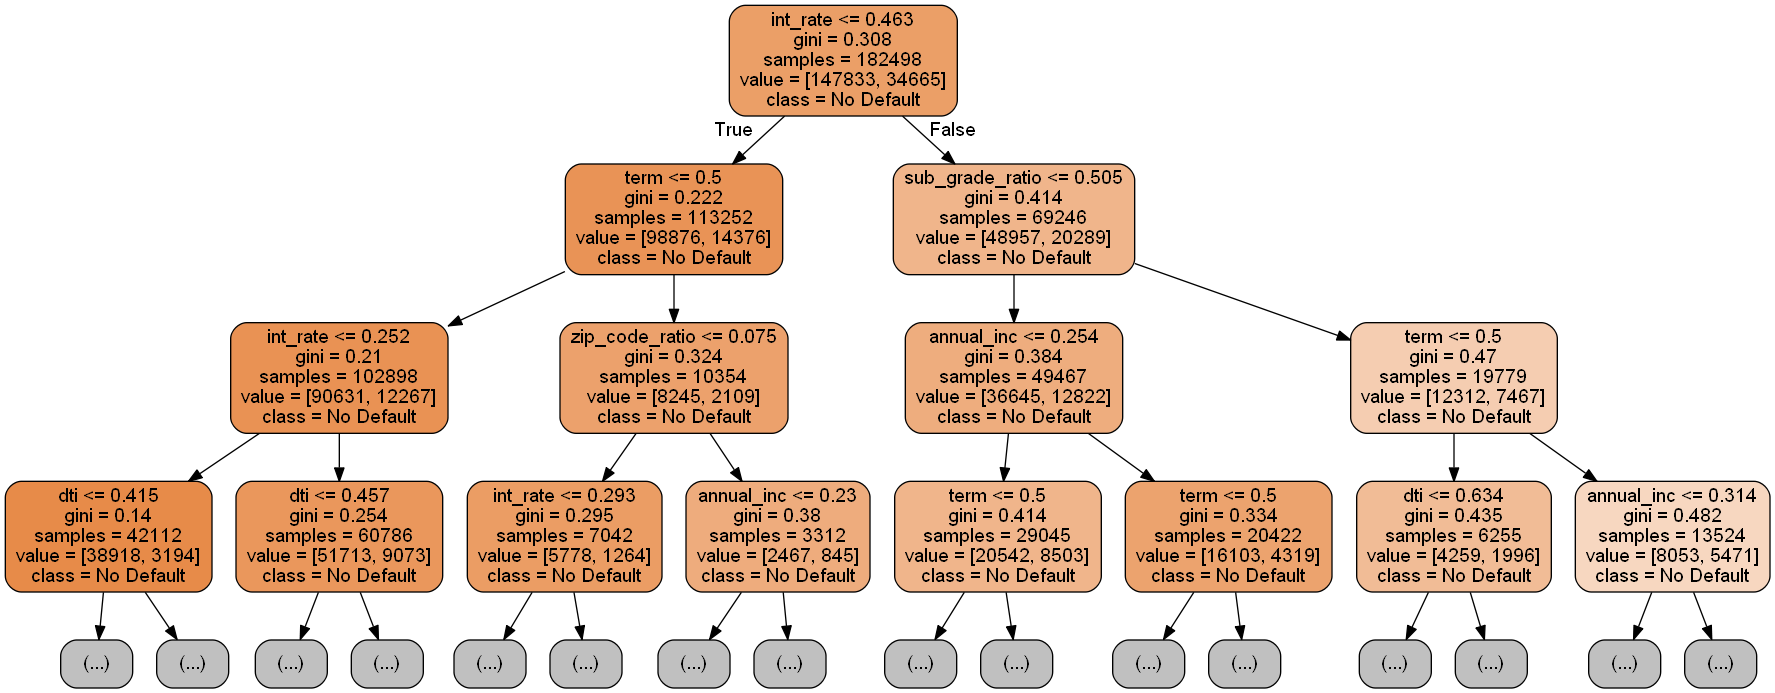

In [58]:
from graphviz import Source
from sklearn import tree
from IPython.display import Image

graph = Source(tree.export_graphviz(tree_model, out_file=None, class_names=['No Default', 'Default'],
                                    filled=True, rounded=True, special_characters=False,
                                    feature_names=TRAIN_VARS, max_depth=3))
png_data = graph.pipe(format='png')
with open('dtree_structure.png', 'wb') as f:
    f.write(png_data)
Image(png_data)

### <font color=blue>6. Important Features

Text(0.5, 1.0, 'Feature Importances for Decision Tree')

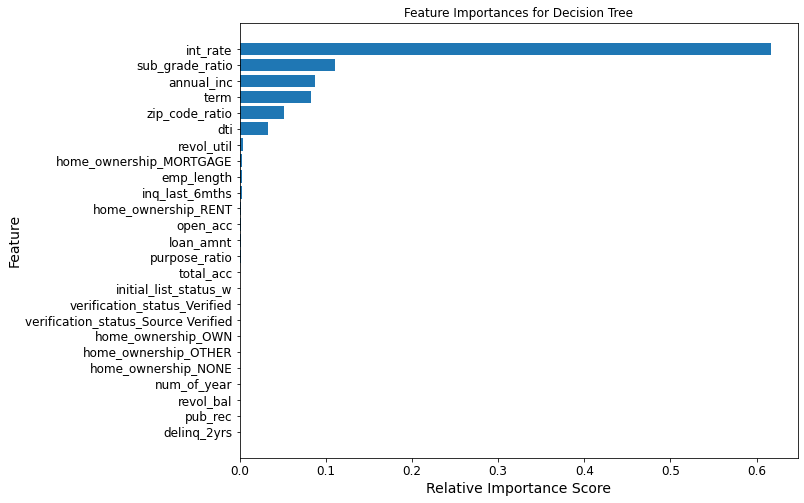

In [59]:
feature_importances = tree_model.feature_importances_
feature_names, feature_scores = zip(*sorted(zip(TRAIN_VARS, feature_importances), key=lambda x: x[1]))
y_position = list(range(len(feature_names)))
plt.figure(figsize=(10,8))
plt.barh(y_position, feature_scores, height=0.8, align='center')
plt.yticks(y_position, feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances for Decision Tree')

### <font color=blue>7. Prediction

In [60]:
y_train_pred = tree_model.predict(X_train)
prob_train_pred = tree_model.predict_proba(X_train)

y_test_pred = tree_model.predict(X_test)
prob_test_pred = tree_model.predict_proba(X_test)

### <font color=blue>8.  Model Evaluation

#### Train data

In [61]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8113
Precision: 0.7689
Recall: 0.8113
F1 Score: 0.7337
ROC-AUC: 0.6958

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90    147833
           1       0.58      0.02      0.04     34665

    accuracy                           0.81    182498
   macro avg       0.70      0.51      0.47    182498
weighted avg       0.77      0.81      0.73    182498


Prediction Confusion Matrix:
------------------------------
Predicted       0    1
Actual                
0          147251  582
1           33859  806


#### Test data

In [62]:
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8108
Precision: 0.7603
Recall: 0.8108
F1 Score: 0.7328
ROC-AUC: 0.6923

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     36906
           1       0.54      0.02      0.04      8642

    accuracy                           0.81     45548
   macro avg       0.67      0.51      0.47     45548
weighted avg       0.76      0.81      0.73     45548


Prediction Confusion Matrix:
------------------------------
Predicted      0    1
Actual               
0          36751  155
1           8463  179


=> THe model now is more general, the accuracy of the train set and test set is quite similar although the performance on test set is a bit lower than on training set

#### Perform 10-fold cross-validation for logistic Regression

In [63]:
kfold = KFold(n_splits=5)

# accuracy
scores = cross_val_score(tree_model, X_train, y_train, cv=kfold, scoring='roc_auc')
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std()))
pd.Series(scores).describe()

Accuracy: 69.01% (+/- 0.13%)


count    5.000000
mean     0.690138
std      0.001400
min      0.689037
25%      0.689455
50%      0.689705
75%      0.689921
max      0.692572
dtype: float64

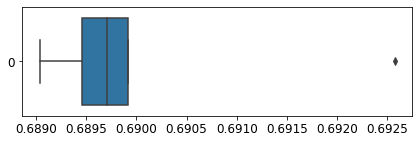

In [64]:
plt.figure(figsize=(7,2))
sns.boxplot(data=scores, orient='h')
plt.show()

---
---

# <font color=red>10. Random Forest

### <font color=blue>1. Overview
    
1. **Idea**: Random forests are an example of an ensemble method, meaning that it combine multiple machine learning algorithms and use the aggregation predictions to obtain better predictive performance. Random forest supports sample both data and features. More specifically, the Random Forest algorithm introduces extra randomness when growing trees instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model.
    
    
2. **Algorithm**: 
    + ***Sampling dataset***: We use bootstrap technique to generate different bootstrapped training sets (select data from the original dataset with replacement)
    + ***Build a Decision Tree with each new sample***: But when building these decision trees, each time a split in a tree is considered, choose a random sample of m attributes as split candidates from the full set of p attributes (The split is allowed to use only one of those m attributes). A fresh sample of m attributes is taken at each split. The number of predictors considered at each split is approximately equal to the square root of the total number of predictors (m ≈ sqrt(p))
    + ***Prediction***: Once all predictors are trained, the ensemble can make a prediction for a new instance by simply chosing the major votes in the leaf

### <font color=blue>2. Train model

In [65]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# default parameters
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### <font color=blue>3. Performance on Train set vs. Test set

In [66]:
y_train_pred = rf_model.predict(X_train)
prob_train_pred = rf_model.predict_proba(X_train)

y_test_pred = rf_model.predict(X_test)
prob_test_pred = rf_model.predict_proba(X_test)

In [67]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147833
           1       1.00      1.00      1.00     34665

    accuracy                           1.00    182498
   macro avg       1.00      1.00      1.00    182498
weighted avg       1.00      1.00      1.00    182498


Prediction Confusion Matrix:
------------------------------
Predicted       0      1
Actual                  
0          147833      0
1               3  34662

Model Performance metrics:
------------------------------
Accuracy: 0.8087
Precision: 0.7503
Recall: 0.8087
F1 Score: 0.7428
ROC-AUC: 0.6973

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     36906
           1 

### <font color=blue>4. Tuning hyper-parameters - GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap' : [True],
    'max_depth': [6, 8],
    #'max_features' : ['auto', None, 'sqrt', 'log2'],
    'max_features' : ['sqrt', 8, 10],
    'min_samples_leaf' : [50, 100],
    'min_samples_split' : [100],
    'n_estimators' : [500]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total= 1.7min
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total= 1.8min
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total= 1.5min
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total= 1.5min
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total= 1.5min
[CV] bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=Tru

[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total= 1.9min
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total= 1.9min
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total= 1.9min
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500, total= 1.9min
[CV] bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=500 
[CV]  bootst

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 147.9min finished


#### View the hyperparameters and detailed information for the model

In [69]:
# view best score
print('Accuracy:{}'.format(grid_search.best_score_))
# View best hyperparameters
print('Best hyperparameters::\n{}'.format(grid_search.best_params_))
# View detailed informatino of each iteration of GridSearchCV()
gridsearch_df = pd.DataFrame(grid_search.cv_results_)
gridsearch_df.head(5)

Accuracy:0.8114225939010525
Best hyperparameters::
{'bootstrap': True, 'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 500}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,92.739711,7.290687,2.601595,0.301082,True,6,sqrt,50,100,500,"{'bootstrap': True, 'max_depth': 6, 'max_featu...",0.810055,0.810164,0.810219,0.810159,0.810187,0.810157,0.000055,12
1,83.175217,3.253254,2.288927,0.084459,True,6,sqrt,100,100,500,"{'bootstrap': True, 'max_depth': 6, 'max_featu...",0.810137,0.810164,0.810247,0.810351,0.810132,0.810206,0.000083,11
2,129.168832,7.425627,2.817426,0.224181,True,6,8,50,100,500,"{'bootstrap': True, 'max_depth': 6, 'max_featu...",0.810712,0.810740,0.810932,0.811146,0.810488,0.810803,0.000221,9
3,126.700274,3.348370,2.470928,0.078891,True,6,8,100,100,500,"{'bootstrap': True, 'max_depth': 6, 'max_featu...",0.810740,0.810740,0.810877,0.811091,0.810461,0.810781,0.000206,10
4,154.595372,1.641794,2.390820,0.013578,True,6,10,50,100,500,"{'bootstrap': True, 'max_depth': 6, 'max_featu...",0.811123,0.811041,0.810466,0.811200,0.810817,0.810929,0.000265,6


In [70]:
rf_model = best_model
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 10,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### <font color=blue>5. Model Interpretation - Important features

<AxesSubplot:>

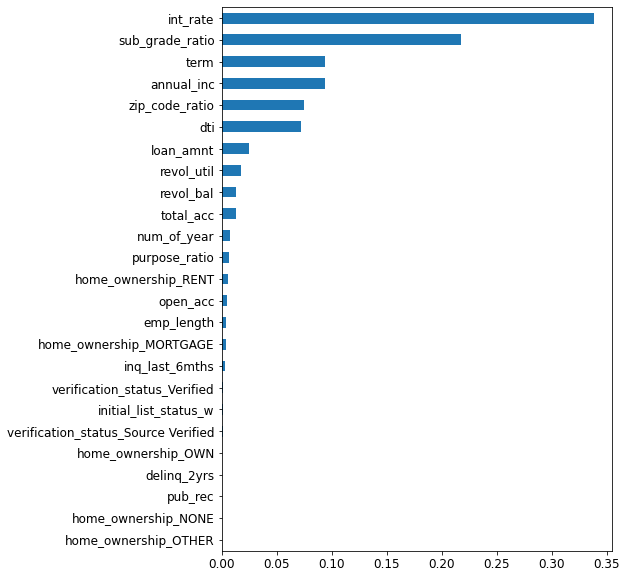

In [71]:
feature_importance = pd.Series(rf_model.feature_importances_, index=TRAIN_VARS)
feature_importance.sort_values(inplace=True, ascending=True)
feature_importance.plot.barh(figsize=(7,10))
#feature_importance.plot.bar(figsize=(7,5))

### <font color=blue>6. Prediction

In [72]:
y_train_pred = rf_model.predict(X_train)
prob_train_pred = rf_model.predict_proba(X_train)

y_test_pred = rf_model.predict(X_test)
prob_test_pred = rf_model.predict_proba(X_test)

### <font color=blue>7. Performance Evaluation

#### Performance metric in Train set and Test set

In [73]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 0.813
Precision: 0.7843
Recall: 0.813
F1 Score: 0.7378
ROC-AUC: 0.7252

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90    147833
           1       0.66      0.03      0.06     34665

    accuracy                           0.81    182498
   macro avg       0.74      0.51      0.48    182498
weighted avg       0.78      0.81      0.74    182498


Prediction Confusion Matrix:
------------------------------
Predicted       0     1
Actual                 
0          147237   596
1           33530  1135

Model Performance metrics:
------------------------------
Accuracy: 0.8111
Precision: 0.7626
Recall: 0.8111
F1 Score: 0.7342
ROC-AUC: 0.7083

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     36906
    

---
---
# <font color=red>11. Gradient Boosting

### <font color=blue>1. Overview

### <font color=blue>2. Train model with default parameters

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

# initiate model
gb_model = GradientBoostingClassifier()

# train model
gb_model.fit(X_train, y_train)

# default parameters
gb_model.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier()>

### <font color=blue>3. Performance on Train set vs. Test set

In [54]:
y_train_pred = gb_model.predict(X_train)
prob_train_pred = gb_model.predict_proba(X_train)

y_test_pred = gb_model.predict(X_test)
prob_test_pred = gb_model.predict_proba(X_test)

In [55]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147833
           1       1.00      1.00      1.00     34665

    accuracy                           1.00    182498
   macro avg       1.00      1.00      1.00    182498
weighted avg       1.00      1.00      1.00    182498


Prediction Confusion Matrix:
------------------------------
Predicted       0      1
Actual                  
0          147833      0
1               0  34665

Model Performance metrics:
------------------------------
Accuracy: 0.7051
Precision: 0.7185
Recall: 0.7051
F1 Score: 0.7115
ROC-AUC: 0.544

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.83      0.80      0.82     36906
           1  

### <font color=blue> 3. Tuning hyper-parameters

In [75]:
param_grid = {
    'max_depth': [6, 8],
    'max_features' : [8, 10],
    'min_samples_leaf' : [50],
    'min_samples_split' : [100],
    'n_estimators' : [500]
}

# Create a based model
gb = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, cv = 10, scoring='roc_auc', verbose = 2)
grid_search.fit(X_train, y_train)
gb_model = grid_search.best_estimator_
gb_model.get_params()

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] max_depth=6, max_features=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, max_features=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total= 4.0min
[CV] max_depth=6, max_features=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.0min remaining:    0.0s


[CV]  max_depth=6, max_features=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total= 3.6min
[CV] max_depth=6, max_features=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[CV]  max_depth=6, max_features=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total= 3.6min
[CV] max_depth=6, max_features=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[CV]  max_depth=6, max_features=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total= 3.5min
[CV] max_depth=6, max_features=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[CV]  max_depth=6, max_features=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total= 3.5min
[CV] max_depth=6, max_features=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500 
[CV]  max_depth=6, max_features=8, min_samples_leaf=50, min_samples_split=100, n_estimators=500, total= 3.4min
[CV] max_depth=6, max_features=8, min_samples_leaf=50, min_sa

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 174.5min finished


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 6,
 'max_features': 10,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### <font color=blue>4. Model Interpretation - Important features

<AxesSubplot:>

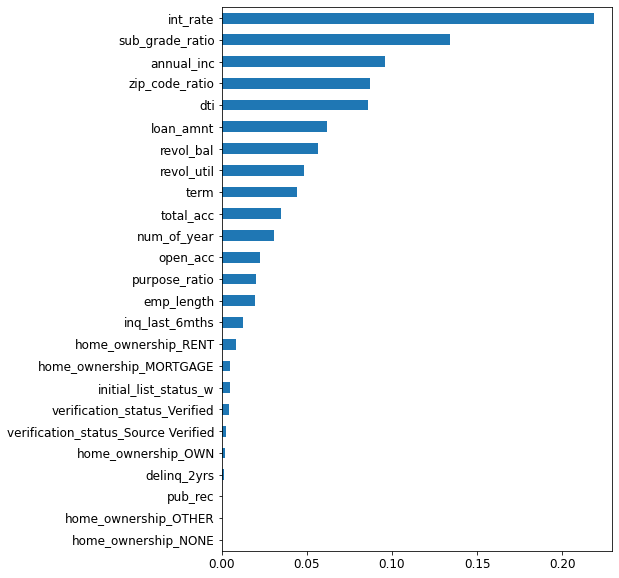

In [76]:
feature_importance = pd.Series(gb_model.feature_importances_, index=TRAIN_VARS)
feature_importance.sort_values(inplace=True, ascending=True)
feature_importance.plot.barh(figsize=(7,10))

### <font color=blue>5. Prediction

In [77]:
y_train_pred = gb_model.predict(X_train)
prob_train_pred = gb_model.predict_proba(X_train)

y_test_pred = gb_model.predict(X_test)
prob_test_pred = gb_model.predict_proba(X_test)

### <font color=blue>6. Performance Evaluation

#### Performance metric in Train set and Test set

In [78]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8338
Precision: 0.8297
Recall: 0.8338
F1 Score: 0.7858
ROC-AUC: 0.8011

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.83      0.99      0.91    147833
           1       0.81      0.16      0.27     34665

    accuracy                           0.83    182498
   macro avg       0.82      0.58      0.59    182498
weighted avg       0.83      0.83      0.79    182498


Prediction Confusion Matrix:
------------------------------
Predicted       0     1
Actual                 
0          146483  1350
1           28988  5677

Model Performance metrics:
------------------------------
Accuracy: 0.8079
Precision: 0.7552
Recall: 0.8079
F1 Score: 0.7531
ROC-AUC: 0.7069

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     36906
  

#### Performance of 10-fold cross validation

In [79]:
kfold = KFold(n_splits = 10, random_state = 10)
scores = cross_val_score(gb_model,X_train,y_train,cv=kfold,scoring='roc_auc')
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std()))

Accuracy: 71.48% (+/- 0.28%)


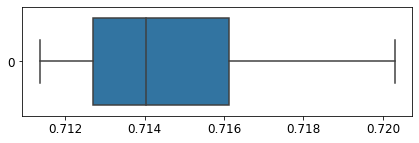

In [80]:
plt.figure(figsize=(7,2))
sns.boxplot(data=scores, orient='h')
plt.show()

---
---

# <font color=red> 12. Xgboost

### <font color=blue> 1. Overview

### <font color=blue>2. Train model with default parameters

In [81]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train, eval_metric="auc", verbose=False)

# default parameters
xgb_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

### <font color=blue>3. Performance on Train set vs. Test set

In [82]:
y_train_pred = xgb_model.predict(X_train)
prob_train_pred = xgb_model.predict_proba(X_train)

y_test_pred = xgb_model.predict(X_test)
prob_test_pred = xgb_model.predict_proba(X_test)

In [83]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8113
Precision: 0.7689
Recall: 0.8113
F1 Score: 0.7337
ROC-AUC: 0.6958

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90    147833
           1       0.58      0.02      0.04     34665

    accuracy                           0.81    182498
   macro avg       0.70      0.51      0.47    182498
weighted avg       0.77      0.81      0.73    182498


Prediction Confusion Matrix:
------------------------------
Predicted       0    1
Actual                
0          147251  582
1           33859  806

Model Performance metrics:
------------------------------
Accuracy: 0.8108
Precision: 0.7603
Recall: 0.8108
F1 Score: 0.7328
ROC-AUC: 0.6923

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     36906
      

### <font color=blue> 3. Tuning hyper-parameters - GridSearchCV

In [84]:
param_grid = {
    'n_estimators': [300],
    'max_depth': [5, 7],
    'learning_rate': [0.3, 0.5]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=XGBClassifier(), 
                           param_grid=param_grid, 
                           cv=10,
                           n_jobs=1,
                           verbose=2,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)
xgb_model = grid_search.best_estimator_
xgb_model.get_params()

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] learning_rate=0.3, max_depth=5, n_estimators=300 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[07:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . learning_rate=0.3, max_depth=5, n_estimators=300, total=  35.6s
[CV] learning_rate=0.3, max_depth=5, n_estimators=300 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.5s remaining:    0.0s


[07:17:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . learning_rate=0.3, max_depth=5, n_estimators=300, total=  37.4s
[CV] learning_rate=0.3, max_depth=5, n_estimators=300 ................
[07:18:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . learning_rate=0.3, max_depth=5, n_estimators=300, total=  35.7s
[CV] learning_rate=0.3, max_depth=5, n_estimators=300 ................
[07:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:

[CV] . learning_rate=0.3, max_depth=7, n_estimators=300, total=  54.8s
[CV] learning_rate=0.5, max_depth=5, n_estimators=300 ................
[07:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . learning_rate=0.5, max_depth=5, n_estimators=300, total=  36.5s
[CV] learning_rate=0.5, max_depth=5, n_estimators=300 ................
[07:33:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . learning_rate=0.5, max_depth=5, n_estimators=300, total=  37.0s
[CV] learning_rate=0.5, m

[07:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . learning_rate=0.5, max_depth=7, n_estimators=300, total=  54.3s
[CV] learning_rate=0.5, max_depth=7, n_estimators=300 ................
[07:46:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] . learning_rate=0.5, max_depth=7, n_estimators=300, total=  54.5s


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 30.5min finished


[07:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.3,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 300,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

#### View grid search results

In [85]:
results = grid_search.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300} 0.8094 0.0009
{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300} 0.8053 0.0016
{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 300} 0.8036 0.001
{'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 300} 0.7932 0.0011


### <font color=blue>4. Model Interpretation - Important features

<AxesSubplot:>

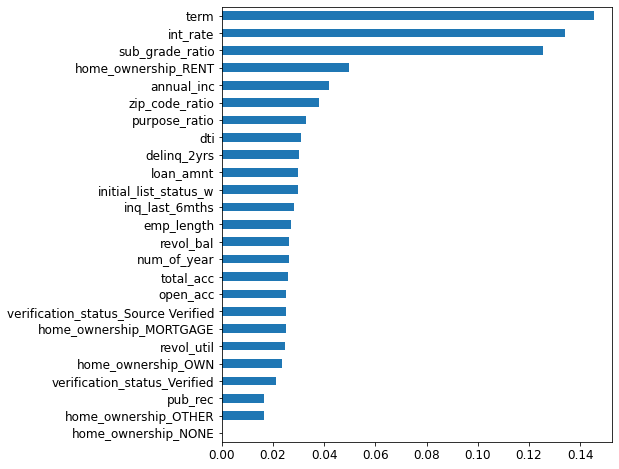

In [86]:
feature_importance = pd.Series(xgb_model.feature_importances_, index=TRAIN_VARS)
feature_importance.sort_values(inplace=True, ascending=True)
feature_importance.plot.barh(figsize=(7,8))

### <font color=blue>5.  Prediction

In [87]:
y_train_pred = xgb_model.predict(X_train[TRAIN_VARS])
prob_train_pred = xgb_model.predict_proba(X_train[TRAIN_VARS])

y_test_pred = xgb_model.predict(X_test[TRAIN_VARS])
prob_test_pred = xgb_model.predict_proba(X_test[TRAIN_VARS])

### <font color=blue>6. Performance Evaluation

In [88]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

Model Performance metrics:
------------------------------
Accuracy: 0.8355
Precision: 0.8287
Recall: 0.8355
F1 Score: 0.7908
ROC-AUC: 0.8134

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.84      0.99      0.91    147833
           1       0.79      0.18      0.30     34665

    accuracy                           0.84    182498
   macro avg       0.81      0.59      0.60    182498
weighted avg       0.83      0.84      0.79    182498


Prediction Confusion Matrix:
------------------------------
Predicted       0     1
Actual                 
0          146167  1666
1           28358  6307

Model Performance metrics:
------------------------------
Accuracy: 0.8078
Precision: 0.7549
Recall: 0.8078
F1 Score: 0.7531
ROC-AUC: 0.7034

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     36906
  

---
---
# <font color=red>14. DNN

### <font color=blue> 1. Overview

### <font color=blue> 2. Train model

In [25]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.metrics import categorical_crossentropy

n_inputs = len(TRAIN_VARS)

dnn_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn_model = Sequential()
dnn_model.add(Dense(8, activation='relu', input_shape=(n_inputs, )))
dnn_model.add(Dense(4, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))

print(dnn_model.summary())

dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 208       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
history = dnn_model.fit(X_train, y_train, validation_split=0.2, batch_size=5, epochs=20, shuffle=True, verbose=2)

Epoch 1/20


KeyboardInterrupt: 

### <font color=blue> 3. Prediction

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_pred[0:5]

### <font color=blue> 4. Model Evaluation

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,21))
ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = y_train_pred)
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = y_test_pred)

### <font color=blue> 5. Tuning hyper-parameters

In [ ]:
# Do a grid search for the optimal batch size and number of epochs
# import necessary packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import Adam

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(n_inputs, input_dim = n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    #adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, verbose = 1)

# define the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 50, 100]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

In [ ]:
# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

In [ ]:
# Do a grid search for learning rate and dropout rate
# import necessary packages
from keras.layers import Dropout

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(learn_rate, dropout_rate):
    # create model
    model = Sequential()
    model.add(Dense(n_inputs, input_dim = n_inputs, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 50, batch_size = 20, verbose = 0)

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

In [ ]:
# Do a grid search to optimize kernel initialization and activation functions
# import necessary packages

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(activation, init):
    # create model
    model = Sequential()
    model.add(Dense(n_inputs, input_dim = n_inputs, kernel_initializer= init, activation= activation))
    model.add(Dense(4, input_dim = 8, kernel_initializer= init, activation= activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 50, batch_size = 20, verbose = 0)

# define the grid search parameters
activation = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# make a dictionary of the grid search parameters
param_grid = dict(activation = activation, init = init)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

In [ ]:
# Do a grid search to find the optimal number of neurons in each hidden layer
# import necessary packages

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(neuron1, neuron2):
    # create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 14, kernel_initializer= 'normal', activation= 'tanh'))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= 'normal', activation= 'tanh'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 20, verbose = 0)

# define the grid search parameters
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), refit = True, verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

---
---
# <font color=red>13. KNN

### <font color=blue> 1. Overview
    
1. KNN classifier is a non-parametric model. It can classify examples by assigning them the class of the most similar labeled examples. KNN algorithm identifies k elements in the training dataset that are the “nearest” in similarity. The unlabeled test example is assigned to the class of the majority of the k nearest neighbors
    
    
2. KNN uses Euclidean to calculate between 2 data points
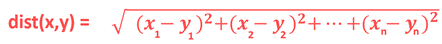
    
3. It is important to scale/normalize data in KNN algorithm. This is because if certain features have much larger values than others -> the distance measurements will be strongly dominated by the larger values. We have to rescale the various features such that each one contributes relatively equally to the distance formula

### <font color=blue>2. Training with default parameters

In [117]:
# Initiate model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Train model
knn_model.fit(X_train, y_train)

# default parameters
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### <font color=blue>3. Select k values
    
Deciding how many neighbors to use for KNN -> determine how well the model will generalize and work on other datasets

In [118]:
error_rate = []

for i in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

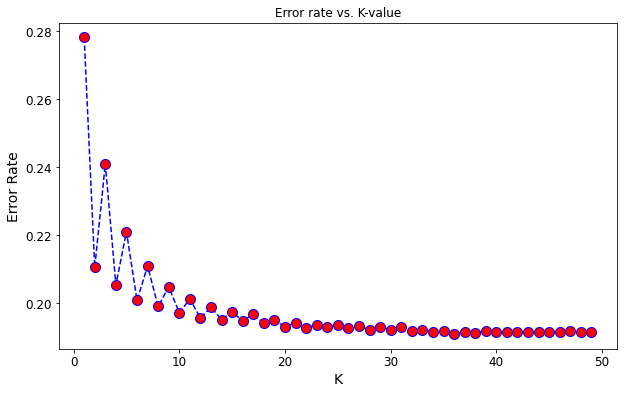

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs. K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### <font color=blue> 4. Tuning hyper-parameter

In [ ]:
params = {"n_neighbors": list(range(20,50,5)), 'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_search = GridSearchCV(KNeighborsClassifier(), params)
grid_search.fit(X_train, y_train)

# KNears best estimator
knn_model = grid_search.best_estimator_
knn_model

### <font color=blue>5.  Retrain with best model

In [ ]:
knn_model = KNeighborsClassifier(n_neighors=20)
knn_model.fit(X_train, y_train)

### <font color=blue>6. Prediction

In [ ]:
y_train_pred = knn_model.predict(X_train)
prob_train_pred = knn_model.predict_proba(X_train)

y_test_pred = knn_model.predict(X_test)
prob_test_pred = knn_model.predict_proba(X_test)

### <font color=blue>7. Performance with 10-fold cross validation

In [ ]:
display_model_performance_metrics(true_labels=y_train, predicted_labels=y_train_pred, predicted_prob = prob_train_pred[:,1])
print()
display_model_performance_metrics(true_labels=y_test, predicted_labels=y_test_pred, predicted_prob = prob_test_pred[:,1])

In [ ]:
scores = cross_val_score(knn_model, X_train, y_train, cv=10)
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores.mean(), 100*scores.std() * 2))

plt.figure(figsize=(6,2))
sns.boxplot(data=scores, orient='h')
plt.show()